# Stack Overflow Survey Analysis 2023

### Introduction

In this analysis, I am using the annual Stack Overflow survey data from 2023 to answer three questions:

1. Is there a difference in the size of companies that hire self-taught developers than the ones who do not?
2. What is difference between the salary of self-taught developers vs. formally-educated developers? Does Years of Experience matter?
3. Does geography matter? Which country are you most likely to excel in as a self-taught developer?

I will only analyse this data using inferential statistics as modelling is not the agenda of this analysis

### Assumptions and Methodology:

1. I have assumed respondents with a formal education as someone with a response = 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)' in the EdLEvel
2. Self-taught developers will be everyone else
3. Columns with all null values are dropped
4. Null rows in EdLevel and CompTotal columns are dropped
5. Direct comparison of Salary was giving a very skewed visualization due to which normalizing the column was necessary

In [82]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\anurag\\OneDrive\\Desktop\\stack-overflow-developer-survey-2023\\survey_results_public.csv")
# df.head()

In [3]:
schema = pd.read_csv("C:\\Users\\anurag\\OneDrive\\Desktop\\stack-overflow-developer-survey-2023\\survey_results_schema.csv")
schema = schema [["qname", "question"]]
# schema.head()

In [22]:
schema

,qname,question
0,S0,"<div><span style=""font-size:19px;""><strong>Hel..."
1,MetaInfo,Browser Meta Info
2,Q310,"<div><span style=""font-size:19px;""><strong>You..."
3,Q120,
4,S1,"<span style=""font-size:22px; font-family: aria..."
...,...,...
73,Knowledge_7,Waiting on answers to questions often causes i...
74,Knowledge_8,I feel like I have the tools and/or resources ...
75,Frequency_1,Needing help from people outside of your immed...
76,Frequency_2,Interacting with people outside of your immedi...


In [4]:
# drop columns with all null values

df = df.dropna(how="all", axis=1)

In [18]:
# unique responses for education

df.EdLevel.unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [45]:
# drop null values in education and salary column

new_df = df.dropna(how="any", subset=["EdLevel", "CompTotal"], axis=0)

In [109]:
# this function will normalize salary
# apply normalization techniques
def scaling(df, column="CompTotal"):

    for column in df.columns: 
        df[column] = df[column]  / df[column].abs().max() 
     
        return df

df_max_scaled = scaling(df)
display(df_max_scaled)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,0.000011,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000022,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,0.000034,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,0.000045,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,0.000056,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,0.999955,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,0.999966,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,0.999978,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,0.999989,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [111]:
# function to divide the dataframe 
# into two groups - formal degree holders and self-taught developers

def education(df, column="EdLevel"):
    '''
    input - 
        1. a dataframe
        2. column - default wil be education level
    
    output - two dataframes:
        1. one with only respondent's with formal education
        2. one with only respondent's with non-formal education
    
    '''
    
    # announce as global to be able to call outside the function
    global formal_data 
    global unformal_data
    
    # formal education
    formal = [
        'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
        'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
        'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
    ]
    
    
    # non-formal education
    non_formal = [
        'Some college/university study without earning a degree',
        'Primary/elementary school',
        'Associate degree (A.A., A.S., etc.)',
        'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
        'Something else'    
    ]
    
    formal_data = df[df[column].isin(formal)] # data for respondent's with formal degree
    unformal_data = df[df[column].isin(non_formal)] # data for respondent's with no formal degree
    
education(df)

## Question 1 - Is there a difference in the size of companies that hire self-taught developers than the ones who do not?

We can see that the top 3 organisations in terms of size hire the most number of self-taught developers. This tell us that you have a higher chance of landing a job as a self-taugh developer in a startup compared to a full-size MNC.

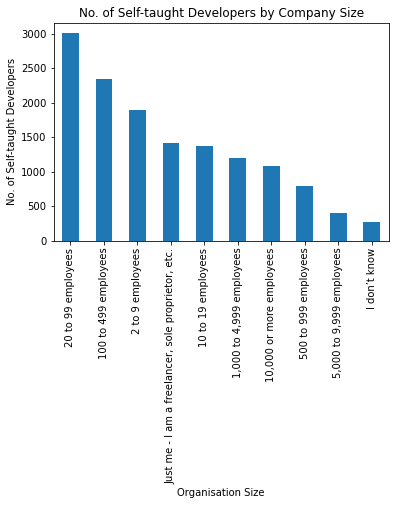

In [112]:
size = unformal_data.groupby("OrgSize")["ResponseId"].count().sort_values(ascending=False) # self-taught developers
size1 = formal_data.groupby("OrgSize")["ResponseId"].count().sort_values(ascending=False) # formal degree holders



size.plot(kind="bar")
plt.xlabel("Organisation Size")
plt.ylabel("No. of Self-taught Developers")
plt.title("No. of Self-taught Developers by Company Size")
plt.show()


## Question 2 - What is difference between the salary of self-taught developers vs. formally-educated developers? Does Years of Experience matter?

It seems that newer developers are earning more than the people who've been coding at work for 50 years. One reason for this could be that new developers might be more in-tune with the newer technologies compared to the developers of the last century. We also see that except for developers who have coding experince of around 40 years and are formally educated, the mean salaries for self-taught developers and degree-holders is very close. 

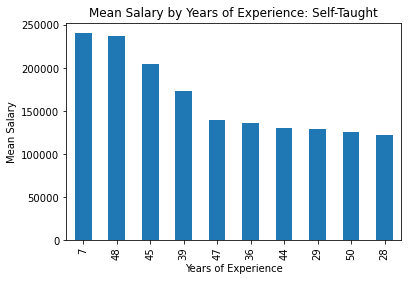

In [123]:
# normalised salary for self-taught developers
# grouped by Years of Experience coding at work

salary = unformal_data.groupby("YearsCodePro")["ConvertedCompYearly"].mean().sort_values(ascending=False)

salary1 = salary[:10]

salary1.plot(kind="bar")
plt.xlabel("Years of Experience")
plt.ylabel("Mean Salary")
plt.title("Mean Salary by Years of Experience: Self-Taught")
plt.show()

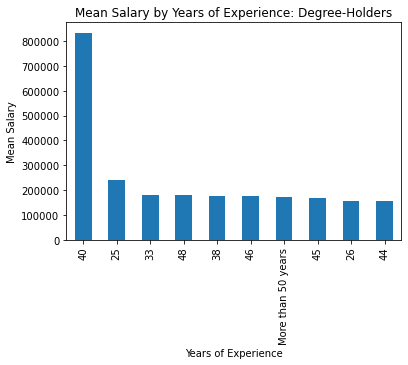

In [124]:
# normalised salary for educated developers
# grouped by Years of Experience coding at work

salary_formal = formal_data.groupby("YearsCodePro")["ConvertedCompYearly"].mean().sort_values(ascending=False)

salary2 = salary_formal[:10]

salary2.plot(kind="bar")
plt.xlabel("Years of Experience")
plt.ylabel("Mean Salary")
plt.title("Mean Salary by Years of Experience: Degree-Holders")
plt.show()

## Question 3 - Does geography matter? Which country are you most likely to excel in as a self-taught developer?

USA is the top destination for self-taught developers to work, in terms of job availability as accessibility that is. This also makes sense if we look at which country drives innovation at present, most of the tech companies in the world at present have originated from the Unites States and it is still the hotspot for tech-related startups.

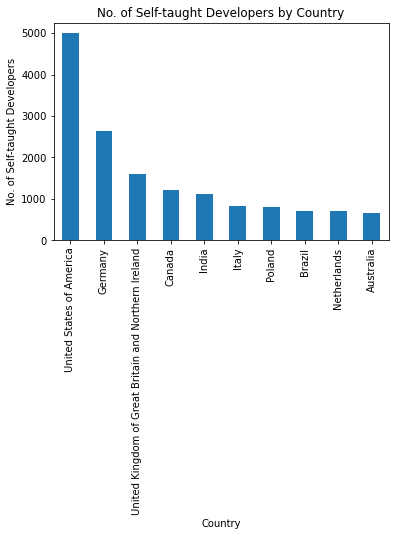

In [98]:
# numbers of self-taught developers 
# based on country of residence

country = unformal_data.groupby("Country")["ResponseId"].count().sort_values(ascending=False)

country1 = country[:10]

country1.plot(kind="bar")
plt.ylabel("No. of Self-taught Developers")
plt.title("No. of Self-taught Developers by Country")b
plt.show()

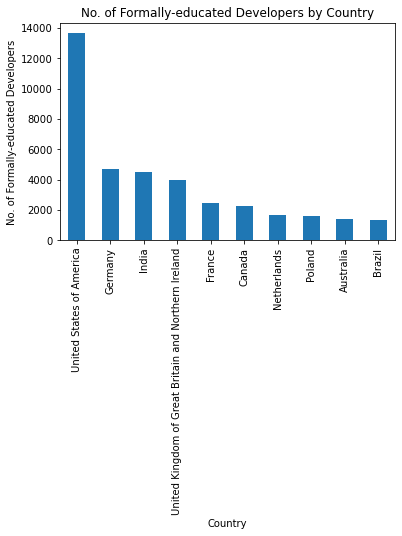

In [101]:
# numbers of educated developers 
# based on country of residence

country2 = formal_data.groupby("Country")["ResponseId"].count().sort_values(ascending=False)

country3 = country2[:10]

country3.plot(kind="bar")
plt.ylabel("No. of Formally-educated Developers")
plt.title("No. of Formally-educated Developers by Country")
plt.show()